## K-means clustering

- We have a data set $\{x_1, x_2,\ldots,x_N\}$ of $N$ observations in the $D$ dimensional Euclidean space.
- Given $K\in\mathbb{N}$, we want to partition the data set into $K$ clusters. 
- Thus, we want to find $K$ vectors $\{\mu_k\}_{k=1}^K\subset\mathbb{R}^D$ and $N$ one-hot-encoding vectors $\{r_n\}_{n=1}^N\subset\mathbb{R}^K$ that minimize 
$$J = \sum_{n=1}^N\sum_{k=1}^Kr_{nk}\|x_n-\mu_k\|^2.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X ,y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

In [3]:
print(X[:5,:])

[[2.60509732 1.22529553]
 [0.5323772  3.31338909]
 [0.802314   4.38196181]
 [0.5285368  4.49723858]
 [2.61858548 0.35769791]]


In [4]:
print(y[:5])

[1 0 0 0 1]


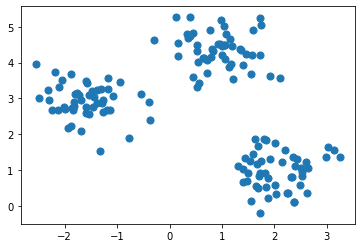

In [5]:
plt.scatter(X[:,0], X[:,1], marker = 'o', s = 50)
plt.show()

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 10, max_iter = 300, tol = 1e-04, random_state  = 0)
y_km = km.fit_predict(X)

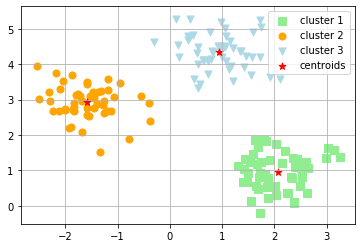

In [7]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, c = 'lightgreen', marker = 's', label = 'cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, c = 'orange', marker  = 'o', label = 'cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', label = 'cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'red', marker = '*', label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()

In [8]:
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i, n_init = 10, max_iter = 300, random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)

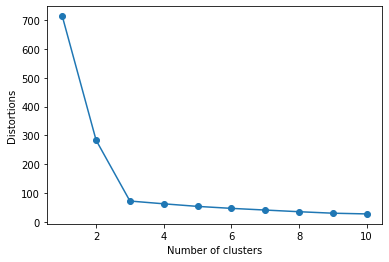

In [9]:
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

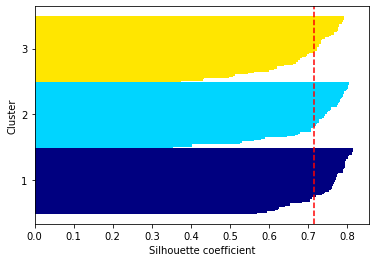

In [10]:
km = KMeans(n_clusters=3, init='k-means++',n_init=10, max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle= "--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()